## Preamble 

In [1]:
import sys
sys.path.extend(["../../src/core", "../../src/utils"])
from draw import Draw
from io_manager import Load
from analyse import Analyse
from pyutils.pyplot import Plot
from pyutils.pyselect import Select
from pyutils.pyvector import Vector
from pyutils.pyprint import Print

import awkward as ak
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

## Load data

In [47]:
ana_label = "dev_CRY_mix2BB_onspill-LH_aw_noCRV"
data = Load(in_path = f"../../output/results/{ana_label}").load_pkl() 
events = data["events"]

[Load] ✅ Initialised with out_path=../../output/results/dev_CRY_mix2BB_onspill-LH_aw_noCRV
[Load] ✅ Successfully loaded results from ../../output/results/dev_CRY_mix2BB_onspill-LH_aw_noCRV/results.pkl


In [63]:
printer = Print()
# printer.print_n_events(data["events"])

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1


## Prepare data

In [80]:
##### dT #####

# Select
leading_dT = events["leading_dT"][events["select"]]
# Flatten to track level 
leading_dT_flat = ak.flatten(ak.flatten(leading_dT, axis=-1), axis=-1)
# Store
events["leading_dT_flat"] = leading_dT_flat
# Valid mask (used to match momenta) 
events["valid_leading_dT_flat"]  = ~ak.is_none(events["leading_dT_flat"] , axis=-1)

# ##### Momentum #####

# Get momentum magnitude at tracker front
vector = Vector(verbosity=0)
selector = Select(verbosity=0)
mom_mag = vector.get_mag(events["trkfit"]["trksegs"], "mom")
at_trk_front = selector.select_surface(events["trkfit"], surface_name="TT_Front")
mom_mag_at_trk_front = mom_mag[at_trk_front] 
# Flatten to track level 
mom_mag_at_trk_front = ak.flatten(mom_mag_at_trk_front, axis=-1)
# Store
events["mom_mag_at_trk_front"] = mom_mag_at_trk_front

# #### Veto ######

# split by all and unvetoed 
events = events 
events["unvetoed"] = ak.any(events["unvetoed_raw"] & events["select"], axis=-1)
unvetoed_events = events[events["unvetoed"]]

In [71]:
# ##### dT #####

# # Select 
# leading_dT = events["leading_dT"][events["select"]]
# leading_dT_unvetoed = events["leading_dT"][events["select"] & events["unvetoed_raw"]]
# # Flatten to track level 
# leading_dT = ak.flatten(ak.flatten(leading_dT, axis=-1), axis=-1)
# leading_dT_unvetoed = ak.flatten(ak.flatten(leading_dT_unvetoed, axis=-1), axis=-1)
# # Shapes
# print("leading_dT", leading_dT.type)
# print("leading_dT_unvetoed", leading_dT_unvetoed.type)

# # Valid masks (used to match momenta) 
# valid_leading_dT = ~ak.is_none(leading_dT, axis=-1)
# valid_leading_dT_unvetoed = ~ak.is_none(leading_dT_unvetoed, axis=-1)

# ##### Momentum #####

# # Get momentum magnitude at tracker front
# vector = Vector(verbosity=0)
# selector = Select(verbosity=0)
# mom_mag = vector.get_mag(events["trkfit"]["trksegs"], "mom")
# at_trk_front = selector.select_surface(events["trkfit"], surface_name="TT_Front")
# mom_mag_at_trk_front = mom_mag[at_trk_front] 
# # Flatten to track level 
# mom_mag_at_trk_front = ak.flatten(mom_mag_at_trk_front, axis=-1)

# print("mom_mag_at_trk_front", mom_mag_at_trk_front.type) 

## Plot 

In [72]:
plotter = Plot()
out_path = Path("../../output/images/comp/dT")
out_path.mkdir(parents=True, exist_ok=True)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


### Main dT

[pyplot] ✅ Wrote:
	../../output/images/comp/dT/h1_dT_leading_all.png


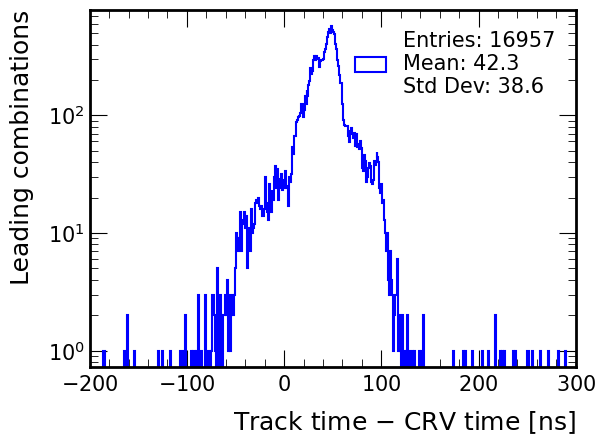

In [79]:
plotter.plot_1D( 
    ak.flatten(events["leading_dT_flat"], axis=None),
    nbins=500,
    xmin=-200, 
    xmax=300,
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Leading combinations",
    stat_box=True,
    log_y=True,
    show=True,
    col="blue",
    out_path=f"{out_path}/h1_dT_leading_all.png"
)

## Unvetoed 

	Wrote ../../output/images/comp/dT/h1_1x2_mom_and_dT.png


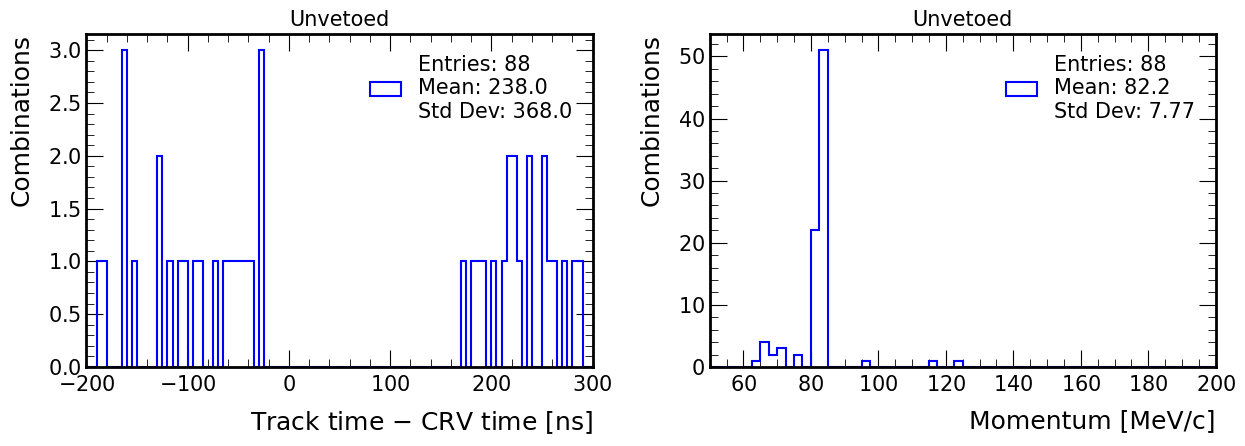

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(2*6.4, 4.8))

plotter.plot_1D( 
    ak.flatten(unvetoed_events["leading_dT_flat"], axis=None),
    nbins=100,
    xmin=-200, 
    xmax=300,
    title=r"Unvetoed",
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Combinations",
    show=False,
    col="blue",
    ax=ax[0]
)

plotter.plot_1D( 
    ak.flatten(unvetoed_events["mom_mag_at_trk_front"][unvetoed_events["valid_leading_dT_flat"]], axis=None),
    nbins=60,
    xmin=50, 
    xmax=200,
    col="blue",
    title=r"Unvetoed",
    xlabel=r"Momentum [MeV/c]",
    ylabel=r"Combinations",
    show=False,
    ax=ax[1]
)

plt.tight_layout()
out_file_name = f"{out_path}/h1_1x2_mom_and_dT.png"
plt.savefig(out_file_name, dpi=300)
print(f"\tWrote {out_file_name}")
plt.show()

# 2D comparison 

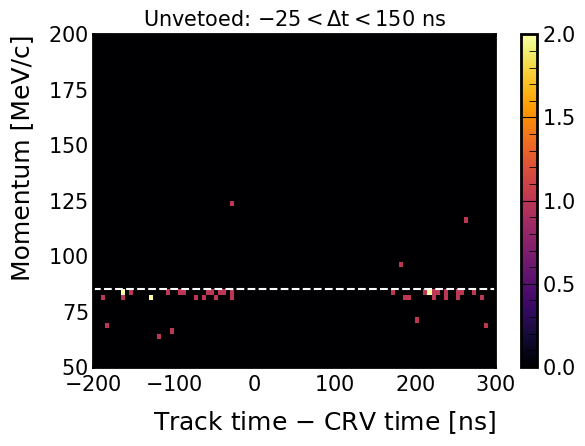

Wrote ../../output/images/comp/dT/h2_mom_vs_dt_unvetoed.png


In [84]:
fig, ax = plt.subplots()

plotter.plot_2D( 
    x=ak.flatten(unvetoed_events["leading_dT_flat"], axis=None),
    y=ak.flatten(unvetoed_events["mom_mag_at_trk_front"][unvetoed_events["valid_leading_dT_flat"]], axis=None),
    nbins_x=100,
    xmin=-200, 
    xmax=300,
    nbins_y=60,
    ymin=50, 
    ymax=200,
    show=False,
    ax=ax,
    title=r"Unvetoed: $-25 < \Delta t < 150$ ns",
    xlabel=r"Track time $-$ CRV time [ns]",
    ylabel=r"Momentum [MeV/c]",
)

plt.tight_layout()
ax.axhline(85, linestyle="--", color="white")

out_file_name = f"{out_path}/h2_mom_vs_dt_unvetoed.png"
plt.savefig(out_file_name, dpi=300)
plt.show()
print(f"Wrote {out_file_name}")

## CRV z-position? 

Need non-leading dT for this 

## Events above 85 

In [94]:
condition = (
    ak.all(unvetoed_events["mom_mag_at_trk_front"] > 85, axis=-1)
)
print(condition)

unvetoed_above_85 = unvetoed_events[condition] # ak.flatten(mom_mag_at_trk_front > 85, axis=-1)] # flatten to event level
print(len(unvetoed_above_85))

[False, False, False, False, False, ..., False, False, False, False, False]
6


In [95]:
printer.print_n_events(unvetoed_above_85, len(unvetoed_above_85))

[pyprint] ⭐️ Printing 6 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 37501
evt.event: 415140
crv.crvcoincs.time: []
crv.crvcoincs.nHits: []
crv.crvcoincs.pos.fCoordinates.fZ: []
at_trk_front: [[False, False, False, False, False, ..., False, False, False, False], ...]
has_trk_front: [True, True, True, True, True]
is_reco_electron: [True, False, False, False, False]
one_reco_electron: [True, True, True, True, True]
one_reco_electron_per_event: True
is_downstream: [True, False, True, True, False]
is_truth_electron: [True, True, True, True, True]
good_trkqual: [True, False, True, False, False]
within_t0: [True, True, True, True, True]
within_t0err: [True, False, True, True, False]
has_hits: [True, True, True, False, False]
within_d0: [True, True, True, False, True]
pitch_angle: [[0.851, 0.683, 0.485, 0.484, -0.438, ..., -0.44, -0.437, 0.483, 0.486], ...]
within_pitch_angle_lo: [True, False, True, True, False]
w